<a href="https://colab.research.google.com/github/alvillegasru/Proyeccion_Energia/blob/main/modulo_1_sesion_2_graficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

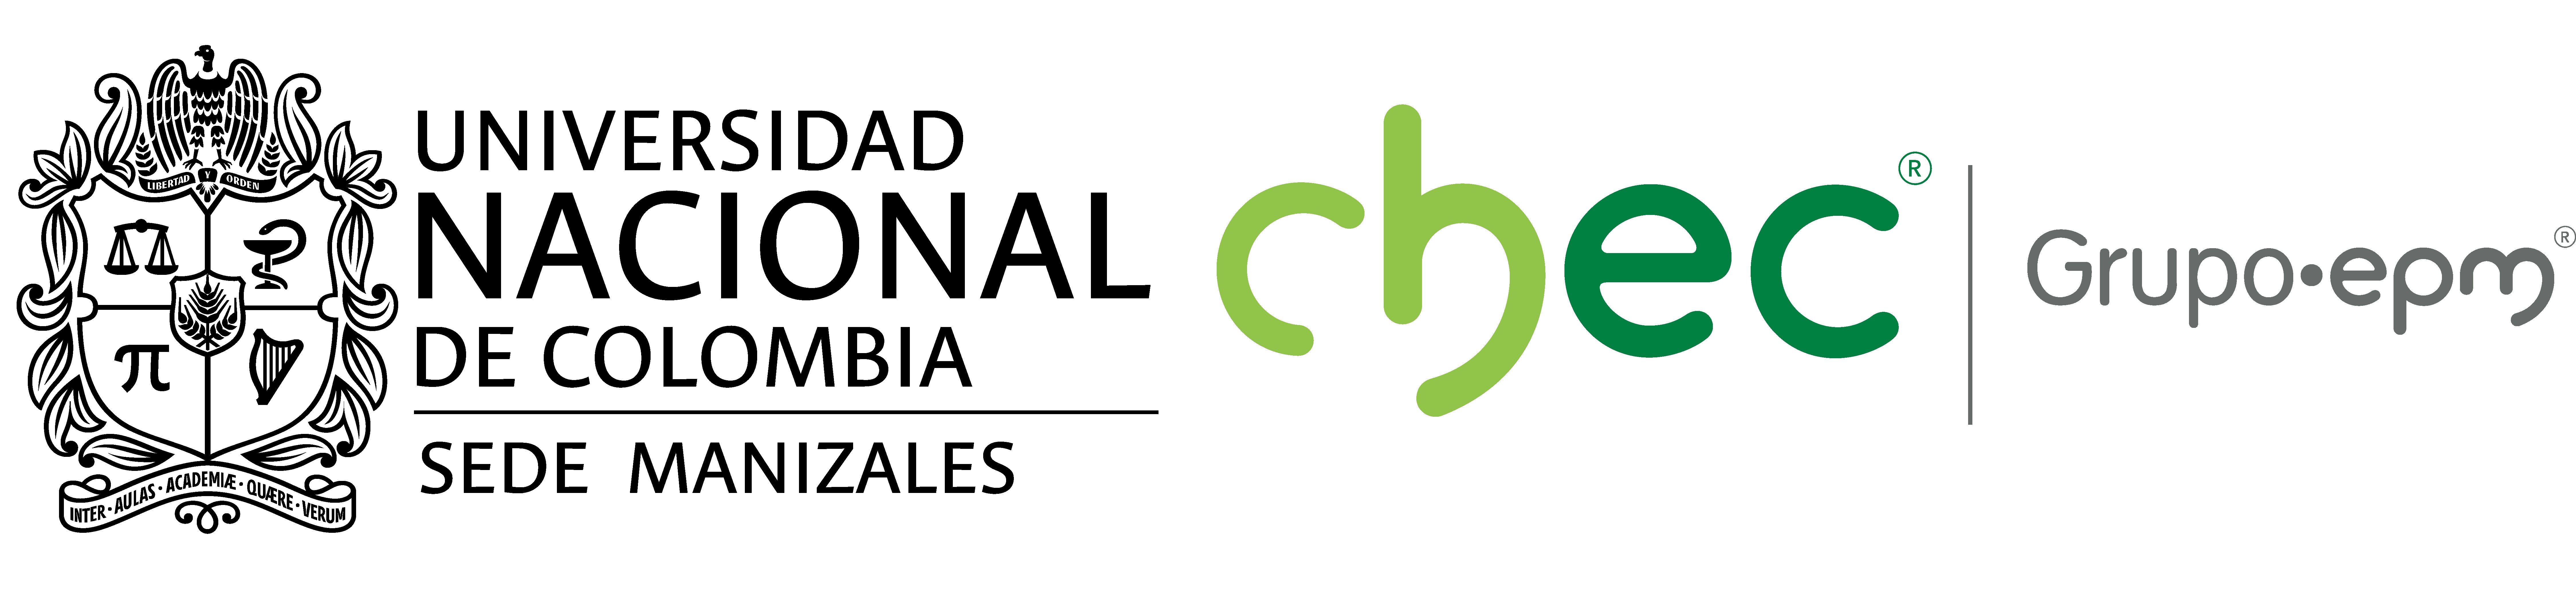

# **MÓDULO 1: PROGRAMACIÓN Y ESTADÍSTICA BÁSICA**

## **Descripción**

En este módulo se abordarán los principios de programación para el manejo de datos desde Python. Además, se estudiarán algunas herramientas para el análisis exploratorio de datos como apoyo a la toma de decisiones informadas.

### **Profesor - Sesión 1 y 2:** Andrés Marino Álvarez Meza

### **Monitores - Sesión 1 y 2:** Danna Valentina Salazar Dubois, Juan Camilo Lugo Rojas y Lucas Miguel Iturriago Salas

### Configuración del entorno de trabajo

#### Descarga de las bases de datos

In [ ]:
!git clone https://github.com/UN-GCPDS/curso_IA_CHEC.git # Copiar el respositorio de GitHub del curso

fatal: destination path 'curso_IA_CHEC' already exists and is not an empty directory.


In [ ]:
# Cambiar el directorio donde situan las bases de datos
%cd /content/curso_IA_CHEC

/content/curso_IA_CHEC


#### Importar las bibliotecas de Python a usar

In [ ]:
# Visualización y gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Manipulación de datos y análisis
import numpy as np
import pandas as pd
import geopandas as gpd

# Widgets interactivos
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, HTML, clear_output

# Utilidades de geometría y mapas
import folium
from shapely import wkt
from shapely.geometry import Point, LineString

# Otras utilidades
import random

**Sesión 2**: En esta sesión aprenderemos a visualizar datos usando Matplotlib, Seaborn y Plotly, utilizando un dataset del consumo de energía.

**Matplotlib** es una biblioteca de visualización en 2D y 3D en Python, conocida por su flexibilidad y control detallado sobre los gráficos, lo que permite crear desde visualizaciones básicas hasta complejas, aunque a menudo requiere más líneas de código para personalizaciones. **Seaborn** es una biblioteca construida sobre Matplotlib que facilita la creación de gráficos estadísticos atractivos y informativos, ofreciendo paletas de colores y estilos predefinidos, y es especialmente útil para trabajar con DataFrames de pandas.

**Plotly** es una biblioteca de visualización de datos interactiva que permite crear una amplia variedad de gráficos y dashboards personalizados, integrándose bien con pandas y facilitando la exploración de datos. **Plotly Express**, como subbiblioteca de Plotly, simplifica aún más este proceso al proporcionar una sintaxis sencilla para generar gráficos multivariados y animados rápidamente a partir de DataFrames.

Nos enfocaremos en las técnicas fundamentales para explorar el dataset mediante visualizaciones, como histogramas, gráficos de densidad, scatters, gráficos de pastel, boxplots, diagramas de violín y geopandas. Exploraremos cómo cada una de estas bibliotecas nos permite analizar y comprender mejor la distribución y relaciones entre las variables clave.

### Cargamos la base de datos, de los consumos de energía, contenida en el archivo csv

Base de datos con datos climáticos y consumo de energía en diferentes zonas.
Las variables (columnas):

1. **Datetime**: Tiempo que captura el registro de datos en intervalos de 10 minutos.
2. **Temperature**: Registros de la temperatura en grados Celsius.
3. **Humidity**: Registros de la humedad en porcentaje.
4. **WindSpeed**: Registro de la velocidad del viento.
5. **GeneralDiffuseFlows**: Registro del flujo de radiación solar difusa.
6. **DiffuseFlows**: Registro del flujo de radiación solar difusa específica.
7. **PowerConsumption_Zone1, PowerConsumption_Zone2, PowerConsumption_Zone3**: Estas tres columnas contienen el consumo de energía eléctrica para tres diferentes zonas.

In [ ]:
consumption = pd.read_csv('Modulo1/databases/powerconsumption.csv', parse_dates=["Datetime"])  # Cargar dataset

In [ ]:
# @title
@interact(x=(0, 100, 1))
def actualizar(x=5):
    display(consumption.head(x))

interactive(children=(IntSlider(value=5, description='x'), Output()), _dom_classes=('widget-interact',))

Para fines ilustrativos requerimos contar además con columnas categóricas. Para ello, podemos discretizar las columnas continuas.

In [ ]:
consumption_cat = consumption.drop(columns=['Datetime']).apply(lambda col: pd.cut(col, bins=10, labels=False))
consumption_cat.sample(10)

Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  DiffuseFlows  \
21731            4         8          0                    0             0   
15287            2         8          0                    0             0   
22770            4         9          0                    0             0   
28681            5         4          7                    0             0   
5066             1         5          0                    0             0   
50430            1         8          0                    0             0   
11822            1         6          0                    0             0   
46188            4         6          0                    0             0   
45937            3         8          0                    0             0   
27643            5         7          7                    0             0   

       PowerConsumption_Zone1  PowerConsumption_Zone2  PowerConsumption_Zone3  
21731                       7                       6                       4  
15287                       2                       1                       2  
22770                       6                       4                       3  
28681                       4                       3                       4  
5066                        1                       1                       1  
50430                       1                       2                       0  
11822                       2                       1                       2  
46188                       6                       7                       3  
45937                       3                       4                       1  
27643                       7                       6                       6

## **Histograma**

Un histograma sirve para visualizar la distribución de datos al mostrar la frecuencia de valores en intervalos o rangos específicos.


Al graficar usando Matplotlib, el primer argumento que recibe la función `plt.hist` es la variable a la cual queremos graficar el histograma, y con el parámetro `bins` escogemos el número de barras.

In [ ]:
def matplotlib_histograma(column_name,bins):
  plt.hist(consumption[column_name], bins=bins, color='blue', edgecolor='black') # Se selecciona la variable y la cantidad de bins
  plt.title(f'Histograma de {column_name}') # Se añade un titulo
  plt.xlabel(f'{column_name}') # Nombre para el eje x
  plt.ylabel('Frecuencia') # Nombre para el eje y
  plt.show()

# Crear el dropdown para seleccionar la columna
column_dropdown = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas
    value=consumption.columns[1],  # Valor inicial (segunda columna, por ejemplo)
    description='Columna:',
)

# Crear un slider para el número de bins
bins_slider = widgets.IntSlider(
    value=30,
    min=10,
    max=100,
    step=5,
    description='Bins:',
    continuous_update=False
)
# Mostrar el widget y la gráfica interactiva
widgets.interactive(matplotlib_histograma, column_name=column_dropdown, bins=bins_slider)

interactive(children=(Dropdown(description='Columna:', options=('Temperature', 'Humidity', 'WindSpeed', 'Gener…

En Plotly podemos generar histogramas interactivos de diferentes maneras. Veamos cómo varia la distribución de algunas variables con los meses.

In [ ]:
# añadimos una columna correspondiente al mes al DataFrame consumption
consumption["month"] = consumption.Datetime.dt.month
px.histogram(consumption, x="Temperature", animation_frame="month", range_x=[0, 40])

También podemos ver varias variables a la vez. Por ejemplo, veamos el consumo de energía en las 3 zonas.

In [ ]:
px.histogram(consumption, x=["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"],
             animation_frame="month", range_x=(0, 60e3))

## **PDF y KDE (Densidad de Probabilidad Kernel)**

La **estimación de densidad kernel (KDE)** es una técnica para estimar la función de densidad de probabilidad de una variable aleatoria continua, para visualizar la distribución subyacente de datos.


Al graficar con Matplotlib y Seaborn, el primer argumento que recibe la función `sns.histplot` es la la variable a la cual queremos graficar el histograma y el parámetro `kde=True`, activa la visualización del KDE. Para este ejemplo seleccionamos los primeros 10000 datos


In [ ]:
# @title
# KDE con histograma
def matplotlib_KDE(column_name,bins):
  sns.histplot(consumption[column_name].head(10000), kde=True, color='blue', bins=bins)
  plt.title(f'Histograma y KDE de {column_name}')
  plt.xlabel(column_name)
  plt.ylabel('Densidad/Frecuencia')
  plt.show()

# Crear el dropdown para seleccionar la columna
column_dropdown = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas
    value=consumption.columns[1],  # Valor inicial (segunda columna, por ejemplo)
    description='Columna:',
)

# Crear un slider para el número de bins
bins_slider = widgets.IntSlider(
    value=30,
    min=10,
    max=100,
    step=5,
    description='Bins:',
    continuous_update=False
)
# Mostrar el widget y la gráfica interactiva
widgets.interactive(matplotlib_KDE, column_name=column_dropdown, bins=bins_slider)

interactive(children=(Dropdown(description='Columna:', options=('Temperature', 'Humidity', 'WindSpeed', 'Gener…

Se crea un gráfico de densidad 2D con distribuciones marginales para visualizar la relación entre dos columnas del DataFrame, junto con un gráfico de dispersión para diferentes categorías, para los primeros 300 datos

In [ ]:
# @title
# Muestrear 500 puntos y eliminar la primera columna de 'consumption'
consumption_sampled = consumption.iloc[:, 1:].sample(500, random_state=42)
consumption_cat_sampled = consumption_cat.iloc[:, 1:].loc[consumption_sampled.index]

# Obtener la lista de columnas de variables continuas después de ignorar la primera
continuous_columns = consumption_sampled.columns.tolist()

# Crear los dropdowns para las variables continuas y la variable categórica (hue)
dropdown_x = widgets.Dropdown(options=continuous_columns, description='X variable')
dropdown_y = widgets.Dropdown(options=continuous_columns, description='Y variable')

# Crear un dropdown para la variable categórica desde 'consumption_cat'
categorical_columns = consumption_cat_sampled.columns.tolist()
dropdown_hue = widgets.Dropdown(options=categorical_columns, description='Hue variable')

# Función para generar el gráfico
def plot_kde(x_col, y_col, hue_col):
    plt.figure(figsize=(10, 10))

    # Usar la paleta de colores 'tab10' para distinguir hasta 10 categorías
    palette = sns.color_palette("tab10", n_colors=10)

    # Crear el gráfico conjunto con kdeplot primero
    g = sns.jointplot(data=consumption_sampled, x=x_col, y=y_col, kind="kde", hue=consumption_cat_sampled[hue_col],
                      fill=True, alpha=0.3, warn_singular=False, palette=palette)

    # Superponer el scatter plot por encima del kdeplot
    g.plot_joint(sns.scatterplot, hue=consumption_cat_sampled[hue_col], s=10, palette=palette)

    # Añadir KDEs marginales individuales arriba y a la derecha
    g.plot_marginals(sns.kdeplot, hue=consumption_cat_sampled[hue_col], warn_singular=False, palette=palette)

    plt.show()

# Conectar los dropdowns a la función interactiva
interact(plot_kde, x_col=dropdown_x, y_col=dropdown_y, hue_col=dropdown_hue)

## **Scatter**

Un scatter plot muestra la relación entre dos variables numéricas al representar cada punto de datos con coordenadas en un gráfico de dispersión.

Al graficar usando Matplotlib, los dos primeros argumentos que recibe la función `plt.scatter` son las variables a la cuales queremos graficar el scatter.

In [ ]:
# @title
def matplotlib_scatter(column_name_1, column_name_2):
  # Crear el gráfico de dispersión
  plt.figure(figsize=(8, 6))
  plt.scatter(consumption[column_name_1], consumption[column_name_2], color='blue', alpha=0.5, s=10)

  # Agregar títulos y etiquetas
  plt.title(f'Scatter Plot: {column_name_1} vs. {column_name_2}')
  plt.xlabel(f'{column_name_1}')
  plt.ylabel(f'{column_name_2}')

  # Mostrar el gráfico
  plt.show()

# Crear el dropdown para seleccionar la columna (variable 1)
column_dropdown_1 = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas
    value=consumption.columns[1],  # Valor inicial (segunda columna, por ejemplo)
    description='Columna: 1',
)

# Crear el dropdown para seleccionar la columna (variable 2)
column_dropdown_2 = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas
    value=consumption.columns[1],  # Valor inicial (segunda columna, por ejemplo)
    description='Columna: 2',
)

# Mostrar el widget y la gráfica interactiva
widgets.interactive(matplotlib_scatter, column_name_1=column_dropdown_1, column_name_2=column_dropdown_2)

Plotly nos permite realizar gráficas como la siguiente, relacionando distintas variables, con muy pocas líneas de código

In [ ]:
# @title
# Crear el scatter plot interactivo
combined_data = consumption.copy()
combined_data['Temperature_cat'] = consumption_cat['Temperature']
combined_data['Humidity_cat'] = consumption_cat['Humidity']
combined_data = combined_data.sort_values(by='Humidity_cat')

fig = px.scatter(
    combined_data,
    x='PowerConsumption_Zone2',
    y='PowerConsumption_Zone1',
    color='Temperature_cat',
    animation_frame="Humidity_cat",
    range_x=[5e3, 4e4],
    range_y=[1e4, 5.5e4],
)

# Mostrar el gráfico interactivo
fig.show()

## **Diagrama de pastel**

Un diagrama de pastel (o gráfico circular) representa la proporción de un conjunto de categorías respecto al total. Cada categoría se visualiza como un "sector" del círculo, cuyo tamaño es proporcional a la frecuencia o porcentaje de esa categoría

$$
\theta_i = \frac{n_i}{N} \cdot 360^\circ
$$

Donde:
- $ \theta_i $ es el ángulo del sector correspondiente a la categoría $ i $ en grados.
- $ n_i $ es el número de ocurrencias (frecuencia) de la categoría $ i $.
- $ N $ es el número total de ocurrencias, es decir, $ N = \sum_{i} n_i $.
- $ 360^\circ $ representa la circunferencia total del círculo.

- Cada ángulo $ \theta_i $ se calcula dividiendo la frecuencia de una categoría $ n_i $ por el total $ N $ para obtener la proporción, y luego se multiplica por 360° para obtener el tamaño del sector en grados.
- Los sectores en el diagrama de pastel suman $ 360^\circ $, ya que representan la totalidad del conjunto de datos.

En `consumption_cat` se selecciona la variable a realizar el diagrama de pastel, esto seleccionado la columna del Dataframe `consumption`, y en el primer argumento de la función `plt.pie` de Matplotlib se pasa el conteo de las categorías.

In [ ]:
# Función para crear el diagrama de pastel
def plot_pie_chart(variable):
    # Contar la frecuencia de cada categoría
    category_counts = consumption_cat[variable].value_counts()

    # Crear un diagrama de pastel
    fig, ax = plt.subplots(figsize=(8, 8))  # Ajustar el tamaño de la figura
    wedges, texts, autotexts = ax.pie(
        category_counts,
        # labels=category_counts.index,
        autopct='%1.1f%%',  # Esto muestra los porcentajes dentro del gráfico
        startangle=90,
        colors=plt.cm.tab20.colors
    )

    # Añadir un título
    plt.title(f'Diagrama de Pastel de {variable} en consumption_cat')

    # Mostrar la leyenda
    plt.legend(wedges, category_counts.index, title="Categorías", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Mostrar el gráfico
    plt.show()

# Crear el dropdown para seleccionar la variable
interact(plot_pie_chart, variable=consumption_cat.columns.tolist());

A continuación podemos ver la versión de Plotly Express

In [ ]:
# Fijar la variable a usar
variable = 'Temperature'

# Contar la frecuencia de cada categoría
category_counts = consumption_cat[variable].value_counts().reset_index()
category_counts.columns = [variable, 'Count']  # Renombrar columnas

# Crear el gráfico de pastel
fig = px.pie(
    category_counts,
    names=variable,
    values='Count',
    title=f'Diagrama de Pastel de {variable} en consumption_cat',
    color_discrete_sequence=px.colors.qualitative.Set3  # Cambiar la paleta de colores
)

# Mostrar el gráfico
fig.show()

## **Boxplot**

Un **boxplot** (o diagrama de caja) es una representación gráfica que resume la distribución de un conjunto de datos, mostrando sus cuartiles y posibles valores atípicos. La expresión matemática que representa un boxplot incluye varios componentes:

1. **Mediana ($ Q_2 $)**: La mediana es el valor que divide el conjunto de datos en dos mitades iguales. Matemáticamente, si tienes un conjunto de datos ordenado $ x_1, x_2, \ldots, x_n $:
   $$
   Q_2 = \text{mediana}(x) =
   \begin{cases}
   x_{(n+1)/2} & \text{si } n \text{ es impar} \\
   \frac{x_{n/2} + x_{(n/2)+1}}{2} & \text{si } n \text{ es par}
   \end{cases}
   $$

2. **Primer cuartil ($ Q_1 $)**: El cuartil 1 es el valor que divide el primer 25% de los datos ordenados.
   $$
   Q_1 = \text{percentil 25} = x_{(n+1)/4}
   $$

3. **Tercer cuartil ($ Q_3 $)**: El cuartil 3 es el valor que divide el 75% de los datos ordenados.
   $$
   Q_3 = \text{percentil 75} = x_{3(n+1)/4}
   $$

4. **Rango intercuartílico (IQR)**: Es la diferencia entre el tercer y el primer cuartil.
   $$
   \text{IQR} = Q_3 - Q_1
   $$

5. **Valores atípicos (outliers)**: Los valores atípicos son aquellos que se encuentran fuera del rango definido por los cuartiles más 1.5 veces el IQR. La fórmula para determinar los límites es:
   $$
   \text{Límite Inferior} = Q_1 - 1.5 \times \text{IQR}
   $$
   $$
   \text{Límite Superior} = Q_3 + 1.5 \times \text{IQR}
   $$

Al graficar usando Matplotlib, el primer argumento que recibe la función `px.boxplot` es la la variable a la cual queremos graficar el boxplot

In [ ]:
# @title
def matplotlib_boxplot(column_name):
  # Boxplot de la velocidad del viento
  plt.boxplot(consumption[column_name], patch_artist=True)
  plt.title(f'Boxplot de {column_name}')
  plt.ylabel(f'{column_name}')
  plt.grid()
  plt.show()

# Crear el dropdown para seleccionar la columna (variable 1)
column_dropdown = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas
    value=consumption.columns[3],  # Valor inicial (segunda columna, por ejemplo)
    description='Columna:',
)

# Mostrar el widget y la gráfica interactiva
widgets.interactive(matplotlib_boxplot, column_name=column_dropdown)

En Plotly Express se usa la función `px.box`

In [ ]:
# @title
fig = px.box(
    combined_data.sort_values(by='month'),
    y='PowerConsumption_Zone2',
    x='Temperature_cat',
    animation_frame="month",
    title='Boxplot de Power Consumption por Temperatura',
)

fig.update_yaxes(range=[0, combined_data['PowerConsumption_Zone2'].max() * 1.1])
fig.update_xaxes(range=[-0.5, len(combined_data['Temperature_cat'].unique()) - 0.5])
# Mostrar el gráfico
fig.show()

## **Diagrama de Violín**

Un **diagrama de violín** muestra la distribución de datos a lo largo de un eje, combinando un histograma y un gráfico de densidad para visualizar la forma de la distribución. Así, un diagrama de violín es una combinación de un **boxplot** y una **estimación de densidad kernel (KDE)**


Al graficar usando Matplotlib y Seaborn, los primeros argumentos que recibe la función `sns.violinplot` son las variables a las cuales queremos hacer diagrama de violín

In [ ]:
# @title
def matplotlib_violin(column_name_1, column_name_2):
  # Crear el diagrama de violín con Seaborn
  concatenated = pd.concat([consumption[column_name_2], consumption_cat[column_name_1]], axis=1)
  plt.figure(figsize=(8, 6))
  sns.violinplot(x=column_name_1, y=column_name_2, data=concatenated)

  # Agregar títulos y etiquetas
  plt.title(f'Violin Plot: {column_name_1} según {column_name_2}')
  plt.xlabel(f'{column_name_1}')
  plt.ylabel(f'{column_name_2}')

  # Mostrar el gráfico
  plt.show()

# Crear el dropdown para seleccionar la columna (variable 1)
column_dropdown_2 = widgets.Dropdown(
    options=consumption.columns.tolist()[1:],  # Lista de nombres de columnas
    value=consumption.columns[3],  # Valor inicial
    description='Columna: 1',
)

# Crear el dropdown para seleccionar la columna (variable 2)
column_dropdown_1 = widgets.Dropdown(
    options=consumption_cat.columns.tolist()[1:],  # Lista de nombres de columnas
    value=consumption_cat.columns[6],  # Valor inicial
    description='Columna: 2',
)

# Mostrar el widget y la gráfica interactiva
widgets.interactive(matplotlib_violin, column_name_1=column_dropdown_1, column_name_2=column_dropdown_2)

In [ ]:
fig = px.violin(
    combined_data.sort_values(by='month'),
    y='PowerConsumption_Zone2',
    x='Temperature_cat',
    animation_frame="month",
    title='Boxplot de Power Consumption por Temperatura',
)

fig.update_yaxes(range=[0, combined_data['PowerConsumption_Zone2'].max() * 1.1])
fig.update_xaxes(range=[-0.5, len(combined_data['Temperature_cat'].unique()) - 0.5])
# Mostrar el gráfico
fig.show()

## **Geopandas**

GeoPandas es una biblioteca de Python diseñada para trabajar con datos geoespaciales de manera eficiente, combinando la funcionalidad de pandas con herramientas para la manipulación de geometrías (puntos, líneas, polígonos) y datos geográficos. Permite realizar operaciones como el análisis espacial, la visualización y la manipulación de datos geográficos en formato vectorial.

#### Cargamos la base de datos con algunos circuitos de la red CHEC

 Se lee un archivo CSV en un DataFrame de pandas, conviertiendo una columna de geometría en objetos geométricos y luego transforma el DataFrame en un GeoDataFrame de GeoPandas para facilitar el manejo de datos espaciales.

In [ ]:
# @title
# Leer el archivo CSV en un DataFrame de pandas
circuitos = pd.read_csv('Modulo1/databases/circuitos.csv')
# Convertir la columna 'geometry' de formato WKT a objetos geométricos
circuitos['geometry'] = circuitos['geometry'].apply(wkt.loads)
# Convertir el DataFrame de pandas a un GeoDataFrame de GeoPandas, especificando la columna de geometría
circuitos = gpd.GeoDataFrame(circuitos, geometry='geometry')
# Mostrar las primeras filas del GeoDataFrame para verificar el contenido
@interact(x=(0, 100, 1))
def actualizar(x=5):
    display(circuitos.head(x))

Se genera un color oscuro aleatorio para los circuitos y crea un mapa centrado en las coordenadas medias de los puntos de un GeoDataFrame usando Folium.

In [ ]:
# @title
# Función para generar un color oscuro aleatorio para los circuitos
def dark_random_color():
    r = random.randint(0, 100)  # Limitar el valor rojo entre 0 y 100 (oscuro)
    g = random.randint(0, 100)  # Limitar el valor verde entre 0 y 100 (oscuro)
    b = random.randint(0, 100)  # Limitar el valor azul entre 0 y 100 (oscuro)
    return f'#{r:02x}{g:02x}{b:02x}'

# @title
# Crear un mapa centrado en la media de las coordenadas de los circuitos
map_center = [circuitos.geometry.centroid.y.mean(), circuitos.geometry.centroid.x.mean()]
m = folium.Map(location=map_center, zoom_start=12)

Se agrupa un GeoDataFrame por la columna 'CIRCUITO', genera un color oscuro aleatorio para cada grupo, y luego añade las líneas (o multilíneas) al mapa como PolyLine utilizando el color asignado y las coordenadas adecuadas.

In [ ]:
# @title
# Agrupar los datos del GeoDataFrame por la columna 'CIRCUITO' para procesar cada grupo de forma individual
for circuito, grupo in circuitos.groupby('CIRCUITO'):
    # Generar un color aleatorio oscuro para cada circuito
    circuito_color = dark_random_color()

    # Ordenar el grupo por 'NODO1_ID' y 'NODO2_ID'
    grupo_sorted = grupo.sort_values(by=['NODO1_ID', 'NODO2_ID'])

    # Lista para almacenar las coordenadas de las líneas
    line_coords = []

    # Iterar sobre cada fila del grupo ordenado
    for idx, row in grupo_sorted.iterrows():
        # Verificar si la geometría es una línea
        if row.geometry.geom_type == 'LineString':
            # Convertir las coordenadas de la línea de (longitud, latitud) a (latitud, longitud)
            coords = [(coord[1], coord[0]) for coord in list(row.geometry.coords)]
            line_coords.append(coords)
        # Verificar si la geometría es una multilinea
        elif row.geometry.geom_type == 'MultiLineString':
            # Iterar sobre cada línea en la multilinea
            for linestring in row.geometry:
                # Convertir las coordenadas de la línea de (longitud, latitud) a (latitud, longitud)
                coords = [(coord[1], coord[0]) for coord in list(linestring.coords)]
                line_coords.append(coords)

    # Agregar cada conjunto de coordenadas de líneas al mapa como una PolyLine
    for coords in line_coords:
        folium.PolyLine(coords, color=circuito_color, weight=1.5, opacity=1).add_to(m)


### Cargamos la base de datos de los interruptores de esos circuitos

Se lee un archivo CSV en un DataFrame de pandas, se convierte una columna de geometría en objetos geométricos y luego se transforma el DataFrame en un GeoDataFrame de GeoPandas para manejar datos espaciales.

In [ ]:
# @title
# Leer el archivo CSV en un DataFrame de pandas
interruptores = pd.read_csv('Modulo1/databases/switches.csv')
# Convertir la columna 'geometry' de formato WKT a objetos geométricos
interruptores['geometry'] = interruptores['geometry'].apply(wkt.loads)
# Convertir el DataFrame de pandas a un GeoDataFrame de GeoPandas, especificando la columna de geometría
interruptores = gpd.GeoDataFrame(interruptores, geometry='geometry')
# Mostrar las primeras filas del GeoDataFrame para verificar el contenido
@interact(x=(0, 100, 1))
def actualizar(x=5):
    display(interruptores.head(x))

Se agregan marcadores circulares al mapa para cada interruptor, ubicados en la latitud y longitud especificadas, con un color y opacidad definidos, y muestra un texto emergente con el ID del interruptor.

In [ ]:
# @title
# Agregar los interruptores al mapa
for idx, row in interruptores.iterrows():
    # Extraer la latitud y longitud de la geometría del interruptor
    lat = row.geometry.y
    lon = row.geometry.x

    # Crear un marcador circular para cada interruptor en el mapa
    folium.CircleMarker(
        location=[lat, lon],  # Ubicación del marcador (latitud, longitud)
        radius=4,  # Radio del marcador
        color='black',  # Color del borde del marcador
        fill=True,  # Rellenar el marcador
        fill_color='black',  # Color de relleno del marcador
        fill_opacity=0.6,  # Opacidad del relleno del marcador
        popup=f"Interruptor ID: {row['CIRCUITO']}"  # Texto emergente con el ID del interruptor
    ).add_to(m)  # Agregar el marcador al mapa

    # Opcional: almacenar la fila y la latitud para su uso posterior
    row_1 = row
    lat_1 = lat


### Cargamos la base de datos con los apoyos de esos circuitos

Se lee un archivo CSV en un DataFrame de pandas, se convierte una columna de geometría en objetos geométricos y luego se transforma el DataFrame en un GeoDataFrame de GeoPandas para manejar datos espaciales.

In [ ]:
# @title
# Leer el archivo CSV en un DataFrame de pandas
apoyos = pd.read_csv('Modulo1/databases/apoyos.csv')
# Convertir la columna 'geometry' de formato WKT a objetos geométricos
apoyos['geometry'] = apoyos['geometry'].apply(wkt.loads)
# Convertir el DataFrame de pandas a un GeoDataFrame de GeoPandas, especificando la columna de geometría
apoyos = gpd.GeoDataFrame(apoyos, geometry='geometry')
# Mostrar las primeras filas del GeoDataFrame para verificar el contenido
@interact(x=(0, 100, 1))
def actualizar(x=5):
    display(apoyos.head(x))

Se agregan marcadores circulares al mapa para cada apoyo, ubicados en la latitud y longitud especificadas, con un color y opacidad definidos, y muestra un texto emergente con el ID del apoyo.

In [ ]:
# @title
# Agregar los apoyos al mapa
for idx, row in apoyos.iterrows():
    # Extraer las coordenadas (latitud y longitud) de la geometría del apoyo
    lat = row.geometry.xy[1][0]  # Coordenadas en el eje y (latitud)
    lon = row.geometry.xy[0][0]  # Coordenadas en el eje x (longitud)

    # Crear un marcador circular para cada apoyo en el mapa
    folium.CircleMarker(
        location=[lat, lon],  # Ubicación del marcador (latitud, longitud)
        radius=2,  # Radio del marcador
        color='blue',  # Color del borde del marcador
        fill=True,  # Rellenar el marcador
        fill_color='blue',  # Color de relleno del marcador
        fill_opacity=0.6,  # Opacidad del relleno del marcador
        popup=f"Apoyo ID: {row['CIRCUITO']}"  # Texto emergente con el ID del apoyo
    ).add_to(m)  # Agregar el marcador al mapa


### Cargamos la base de datos de los transformadores de esos circuitos

Se lee un archivo CSV en un DataFrame de pandas, se convierte una columna de geometría en objetos geométricos y luego se transforma el DataFrame en un GeoDataFrame de GeoPandas para manejar datos espaciales.

In [ ]:
# @title
# Leer el archivo CSV en un DataFrame de pandas
transformadores = pd.read_csv('Modulo1/databases/transformadores.csv')
# Convertir la columna 'geometry' de formato WKT a objetos geométricos
transformadores['geometry'] = transformadores['geometry'].apply(wkt.loads)
# Convertir el DataFrame de pandas a un GeoDataFrame de GeoPandas, especificando la columna de geometría
transformadores = gpd.GeoDataFrame(transformadores, geometry='geometry')
# Mostrar las primeras filas del GeoDataFrame para verificar el contenido
@interact(x=(0, 100, 1))
def actualizar(x=5):
    display(transformadores.head(x))

Se agregan marcadores circulares al mapa para cada transformador, ubicados en la latitud y longitud especificadas, con un color y opacidad definidos, y muestra un texto emergente con el ID del transformador.

In [ ]:
# @title
# Agregar los transformadores al mapa
for idx, row in transformadores.iterrows():
    # Extraer las coordenadas (latitud y longitud) de la geometría del transformador
    lat = row.geometry.y  # Coordenadas en el eje y (latitud)
    lon = row.geometry.x  # Coordenadas en el eje x (longitud)

    # Crear un marcador circular para cada transformador en el mapa
    folium.CircleMarker(
        location=[lat, lon],  # Ubicación del marcador (latitud, longitud)
        radius=6,  # Radio del marcador
        color='green',  # Color del borde del marcador
        fill=True,  # Rellenar el marcador
        fill_color='green',  # Color de relleno del marcador
        fill_opacity=0.9,  # Opacidad del relleno del marcador
        popup=f"Transformador ID: {row['CIRCUITO']}"  # Texto emergente con el ID del transformador
    ).add_to(m)  # Agregar el marcador al mapa


### Gráficamos los equipos de los circuitos usando la biblioteca Folium

In [ ]:
# añadimos las convenciones de los distintos tipos de elementos
legend_html = '''
<div style="position: fixed;
             bottom: 50px; left: 50px; width: 150px; height: auto;
             border:2px solid grey; z-index:9999; font-size:14px;
             background-color: white; padding: 5px;">
&nbsp; <b>Leyenda</b> <br>
<div style="display: flex; align-items: center;">
    <i class="fa fa-circle" style="color:blue; font-size: 8px; margin-right: 5px;"></i>
    Apoyos
</div>
<div style="display: flex; align-items: center;">
    <i class="fa fa-circle" style="color:green; font-size: 10px; margin-right: 5px;"></i>
    Transformadores
</div>
<div style="display: flex; align-items: center;">
    <i class="fa fa-circle" style="color:black; font-size: 7px; margin-right: 5px;"></i>
    Interruptores
</div>
<div style="display: flex; align-items: center;">
    <i class="fa fa-minus" style="color:black; font-size: 10px; margin-right: 5px;"></i>
    Circuitos
</div>
</div>
'''

m.get_root().html.add_child(folium.Element(legend_html))

In [ ]:
m